In [2]:
import cv2

In [3]:
# 图像的读取
retval = cv2.imread("daibao.png", 0) # 0 表示使用灰度值打开
# retval = cv2.imread("daibao.png", 1) # 1 表示使用彩色 打开

In [4]:
# 图像的显示
cv2.imshow("呆宝", retval)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# 图像的保存
cv2.imwrite("daibao_new_create.png", retval)

True

In [ ]:
# 打开pgm照片查看
from PIL import Image

# 使用原始字符串表示路径
image = Image.open("daibao_new_create.pgm")

# 显示图像
image.show()

In [7]:
# 将彩色图像转换为灰度图像

# 读取彩色图像
color_image = cv2.imread("daibao.png")

# 转换为灰度图像
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# 显示彩色和灰度图像
cv2.imshow("Color Image", color_image)
cv2.imshow("Gray Image", gray_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# 灰度图像像素点的变换

color_image = cv2.imread("daibao.png")
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray Image", gray_image)

# 增加亮度
bright_image = gray_image + 50
cv2.imshow("Bright Image", bright_image)

# 反转
reverse_image = 255 - gray_image
cv2.imshow("Reverse Image", reverse_image)

# 二值化
ret, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
cv2.imshow("Binary Image", binary_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
# 放大\缩小图像

# 设置转换倍率
scale = 2

color_image = cv2.imread("daibao.png")
height, width = color_image.shape[:2]
shift_size = (int(width * scale), int(height * scale))

# 转换图像
bigger_image = cv2.resize(color_image, shift_size, interpolation = cv2.INTER_LINEAR)
# 双线性插值。它的作用是在放大或缩小图像时，在目标图像的像素之间进行线性插值，以获得适当地像素值。这是一种平滑的插值方法，通常用于图像的线性变换，例如缩小或放大。

# 显示放大后的图像
cv2.imshow("Normal Image", color_image)
cv2.imshow("Bigger Image", bigger_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
# 旋转图像

# 设置旋转角度
angle = 45

color_image = cv2.imread("daibao.png")
center = (int(width / 2), int(height / 2))

# 旋转图像
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1) # 参数 1 表示图像的缩放因子或缩放比例。
rotated_image = cv2.warpAffine(color_image, rotation_matrix, color_image.shape[:2])
'''
`cv2.warpAffine()` 函数是 OpenCV 中用于进行仿射变换的函数之一。它的作用是根据指定的变换矩阵来对图像进行仿射变换，包括平移、旋转、缩放、剪切等操作。该函数可以用于实现不同类型的几何变换，如平移、旋转、缩放和翻转等。

函数的基本语法如下：

```python
dst = cv2.warpAffine(src, M, dsize)
```

其中：
- `src`：要进行仿射变换的输入图像。
- `M`：变换矩阵，它描述了仿射变换的类型和参数。可以使用 `cv2.getRotationMatrix2D()` 来创建旋转矩阵，或自定义矩阵来实现其他仿射变换。
- `dsize`：目标图像的大小，通常是一个元组，表示目标图像的宽度和高度。

`cv2.warpAffine()` 函数会根据给定的变换矩阵 `M`，对输入图像 `src` 进行相应的变换，并将结果存储在 `dst` 中。

以下是一些常见的应用示例：
- 旋转图像：通过创建旋转矩阵来旋转图像。
- 平移图像：通过创建平移矩阵来平移图像。
- 缩放图像：通过创建缩放矩阵来放大或缩小图像。
- 剪切图像：通过创建自定义仿射变换矩阵来裁剪图像。

通过使用 `cv2.warpAffine()`，你可以实现各种图像的几何变换，以满足不同的需求。
'''

# 显示旋转后的图像
cv2.imshow("Normal Image", color_image)
cv2.imshow("Rotated Image", rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

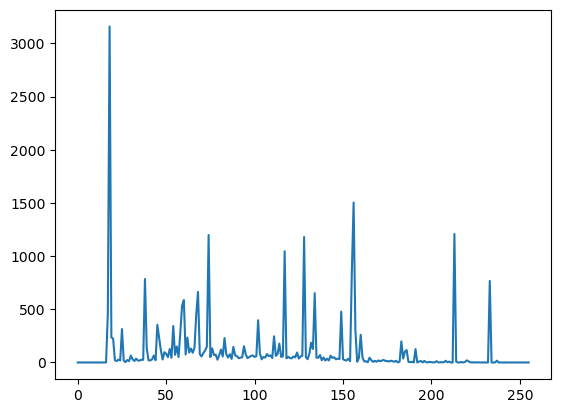

In [12]:
# 图像直方图显示
import matplotlib.pyplot as plt

gray_image = cv2.imread("daibao.png", 0)

# 计算直方图
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
'''
`cv2.calcHist()` 函数用于计算图像的直方图。以下是该函数的参数含义：

1. `images`：这是一个图像的列表，表示要计算直方图的图像。通常，你需要将图像放在一个列表中，即使只有一幅图像也要这样做。在你的示例中，`[gray_image]` 是包含了一个名为 `gray_image` 的图像的列表。

2. `channels`：这是一个用于指定通道的列表，表示要计算直方图的通道。对于灰度图像，通常只有一个通道，因此 `channels` 应该为 `[0]`。如果是彩色图像，你可以选择要计算的通道，比如 `[0]` 表示计算蓝色通道的直方图，`[1]` 表示计算绿色通道的直方图，`[2]` 表示计算红色通道的直方图。

3. `mask`：这是一个可选的掩模图像，用于限制直方图的计算区域。如果不需要掩模，可以将其设置为 `None`。

4. `histSize`：这是一个整数列表，表示要计算的直方图的大小，即直方图中的 bin 数量。在你的示例中，`[256]` 表示计算一个包含256个 bin 的直方图，对应像素值从0到255。

5. `ranges`：这是像素值的范围，通常是 `[0, 256]`，表示像素值的范围从0到255。这个参数用于指定直方图的范围。

`cv2.calcHist()` 函数会返回计算得到的直方图。在你的示例中，`hist` 将包含计算得到的灰度图像的直方图数据。你可以根据需要进一步分析和使用这个直方图数据。
'''

# 显示直方图
plt.plot(hist)

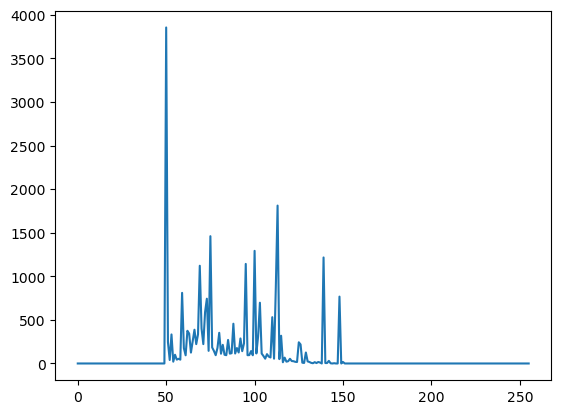

In [13]:
# 线性拉伸
import numpy as np

image = cv2.imread("daibao.png", 0)

# 计算最小和最大像素值
min_val = np.min(image)
max_val = np.max(image)

# 定义拉伸后的最小和最大像素值
new_min = 50
new_max = 150

# 计算出拉伸的比率
lashen_rate = (new_max - new_min) / (max_val - min_val)

# 对每个像素进行拉伸
stretched_image = ((image - min_val) * lashen_rate + new_min).astype(np.uint8)
'''
`.astype(np.uint8)` 是一种数据类型转换操作，它将数组中的元素类型转换为 `uint8`，即无符号8位整数。在图像处理中，`uint8` 数据类型通常表示像素的灰度值，范围从0到255。
'''

# 显示拉伸后的直方图
hist = cv2.calcHist([stretched_image], [0], None, [256], [0, 256])
plt.plot(hist)

cv2.imshow("Gray Image", image)
cv2.imshow("Stretched Image", stretched_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

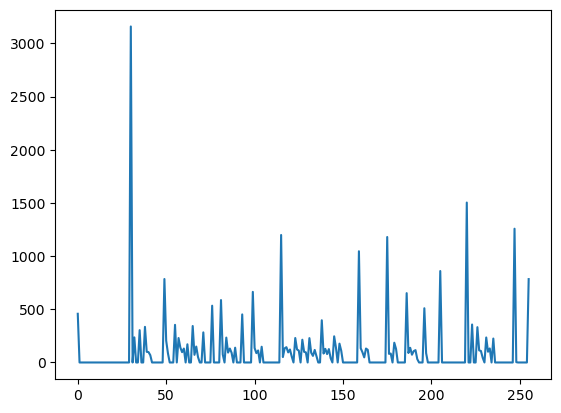

In [14]:
# 直方图均衡化

image = cv2.imread("daibao.png", 0)

equalized_image = cv2.equalizeHist(image)

# 显示均衡化后的直方图
hist = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])
plt.plot(hist)

cv2.imshow("Gray Image", image)
cv2.imshow("Equalized Image", equalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

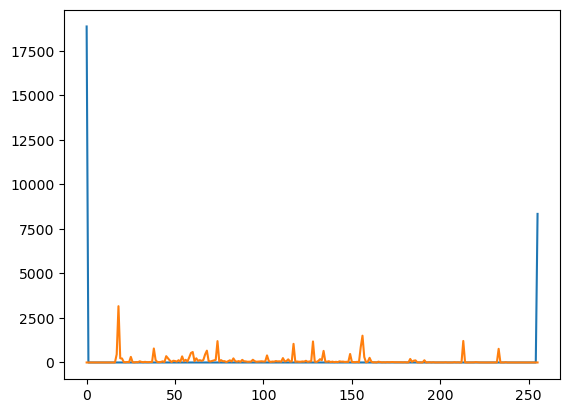

In [15]:
# 基于固定阈值的分割算法

image = cv2.imread("daibao.png", 0)

# 设置阈值
threshold = 128

# 应用固定阈值分割
_, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
'''
`cv2.threshold()` 函数是OpenCV中用于应用图像阈值分割的函数，它有以下参数：

1. `image`: 输入图像，这是你希望应用阈值分割的图像。

2. `threshold`: 阈值，这是一个用于分割图像的像素值阈值。如果像素值高于阈值，它将被分配到高像素值（通常为255）的区域；如果像素值低于或等于阈值，它将被分配到低像素值（通常为0）的区域。

3. `maxval`: 最大像素值，这是分割后高像素值的最终值。通常，高像素值表示前景，所以它们被设置为最大像素值，通常是255。低像素值表示背景，通常被设置为0。

4. `type`: 分割类型，这是一个用于指定分割操作类型的参数。在你的示例中，它被设置为 `cv2.THRESH_BINARY`，这意味着像素值高于阈值的像素将被分配为`maxval`（通常为255），像素值低于或等于阈值的像素将被分配为0。这是一种标准的二值分割操作。

`cv2.threshold()` 函数返回两个值：阈值处理的结果图像和阈值值。在你的示例中，`binary_image` 将包含阈值分割后的二值图像，而阈值值将包含用于分割的阈值。一般情况下，你可以忽略返回的阈值值，除非你需要进一步分析或记录使用的阈值。
'''

# 显示分割后的直方图
hist = cv2.calcHist([binary_image], [0], None, [256], [0, 256])
plt.plot(hist)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.plot(hist)

cv2.imshow("Gray Image", image)
cv2.imshow("Binary Image", binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

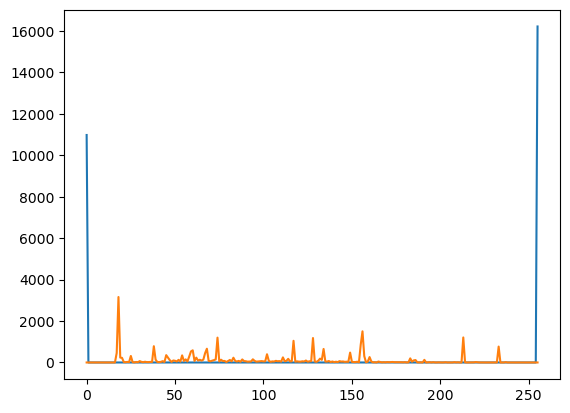

In [16]:
# 基于直方图信息的自适应阈值分割

image = cv2.imread("daibao.png", 0)

# 应用自适应阈值分割
adaptive_threshold_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# 显示分割后的直方图
hist = cv2.calcHist([adaptive_threshold_image], [0], None, [256], [0, 256])
plt.plot(hist)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.plot(hist)

cv2.imshow("Gray Image", image)
cv2.imshow("Adaptive Threshold Image", adaptive_threshold_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
# 边缘检测
import cv2

image = cv2.imread("renxiang.png", 1)

# 边缘检测（使用Canny边缘检测）
edges = cv2.Canny(image, 100, 200)  # 设置低阈值和高阈值

blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
edges2 = cv2.Canny(blurred_image, 100, 200)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges3 = cv2.Canny(gray_image, 100, 200)

blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges4 = cv2.Canny(gray_image, 100, 200)

edges5 = cv2.Canny(image, 50, 150)  # 设置低阈值和高阈值

# 保存结果图像
cv2.imshow('image', image)
cv2.imshow('edges_100-200 no_process', edges)
cv2.imshow('edges_100-200 gauss_blur', edges2)
cv2.imshow('edges_100-200 gray', edges3)
cv2.imshow('edges_100-200 gauss_blur+gray', edges4)
cv2.imshow('edges_50-150 change_threshold', edges5)

print("效果不好的原因是因为阈值范围设置的不好")

cv2.waitKey(0)
cv2.destroyAllWindows()

效果不好的原因是因为阈值范围设置的不好


In [3]:
# 中值滤波和均值滤波
import cv2
import numpy as np

# 读取图像
image = cv2.imread("renxiang.png")

# 显示原始图像
cv2.imshow('Original', image)

# 获取图像的高度和宽度
height, width, _ = image.shape

# 设置噪声密度，即噪声点的数量（你可以根据需要调整这个值）
noise_density = 0.02  # 2%的噪声密度

# 生成随机噪声点的坐标
num_noise_pixels = int(height * width * noise_density)
noise_coordinates = np.random.randint(0, high=height, size=(num_noise_pixels, 2)), np.random.randint(0, high=width, size=(num_noise_pixels, 2))

# 在噪声点的坐标上设置像素值
for i in range(num_noise_pixels):
    x, y = noise_coordinates
    image[x, y] = [0, 0, 0]  # 设置为黑色

# 显示加噪后的图像
cv2.imshow('Noisy', image)

# 应用中值滤波
median_blur = cv2.medianBlur(image, 5)  # 第二个参数是滤波器的核大小

# 应用均值滤波
mean_blur = cv2.blur(image, (5, 5))  # 第二个参数是滤波器的核大小

# 显示原始图像和均值滤波后的图像

cv2.imshow('Median_Blur', median_blur)
cv2.imshow('Mean_Blur', mean_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()    

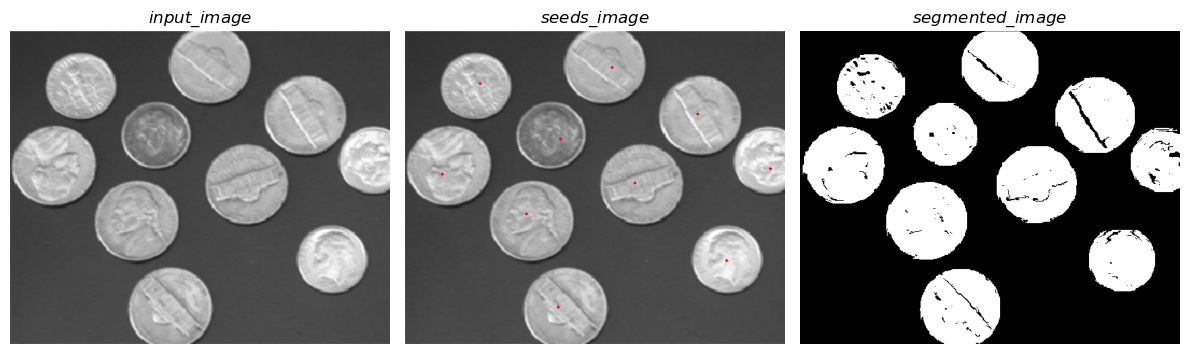

In [1]:
# 区域生长算法实现区域识别

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# 计算种子点和其领域的像素值之差
def getGrayDiff(gray, current_seed, tmp_seed):
    return abs(int(gray[current_seed[0], current_seed[1]]) - int(gray[tmp_seed[0], tmp_seed[1]]))

# 区域生长算法
def regional_growth(gray, seeds):
    #八领域
    connects = [(-1, -1), (0, -1), (1, -1), (1, 0),
                (1, 1), (0, 1), (-1, 1), (-1, 0)]
    seedMark = np.zeros((gray.shape))
    height, width = gray.shape
    threshold = 6
    seedque = deque()
    label = 255
    seedque.extend(seeds)

    while seedque :
        #队列具有先进先出的性质。所以要左删
        current_seed = seedque.popleft()
        seedMark[current_seed[0], current_seed[1]] = label
        for i in range(8) :
            tmpX = current_seed[0] + connects[i][0]
            tmpY = current_seed[1] + connects[i][1]
            #处理边界情况
            if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= width :
                continue

            grayDiff = getGrayDiff(gray, current_seed, (tmpX, tmpY))
            if grayDiff < threshold and seedMark[tmpX, tmpY] != label :
                seedque.append((tmpX, tmpY))
                seedMark[tmpX, tmpY] = label
    return seedMark

#交互函数
def Event_Mouse(event, x, y, flags, param) :
    #左击鼠标
    if event == cv.EVENT_LBUTTONDOWN :
        #添加种子
        seeds.append((y, x))
        #画实心点
        cv.circle(img, center = (x, y), radius = 2,
                  color = (0, 0, 255), thickness = -1)

def Region_Grow(img):
    cv.namedWindow('img')
    cv.setMouseCallback('img', Event_Mouse)
    cv.imshow('img', img)

    while True :
        cv.imshow('img', img)
        if cv.waitKey(1) & 0xFF == ord('q') :
            break
    cv.destroyAllWindows()

    CT = cv.imread('coin.png', 1)
    seedMark = np.uint8(regional_growth(cv.cvtColor(CT, cv.COLOR_BGR2GRAY), seeds))
    
    cv.imshow('seedMark', seedMark)
    cv.waitKey(0)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(131), plt.imshow(cv.cvtColor(CT, cv.COLOR_BGR2RGB))
    plt.axis('off'), plt.title(f'$input\_image$')
    plt.subplot(132), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis('off'), plt.title(f'$seeds\_image$')
    plt.subplot(133), plt.imshow(seedMark, cmap='gray', vmin = 0, vmax = 255)
    plt.axis('off'), plt.title(f'$segmented\_image$')
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    img = cv.imread('coin.png')
    seeds = []
    Region_Grow(img)

In [5]:
# 分水岭算法 实现图像分割 
img = cv2.imread('coin.png')

grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh_img = cv2.threshold(grey, 50, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opening = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, kernel, iterations=2)

# 背景区域
sure_bg = cv2.dilate(opening, kernel, iterations=2)

# 前景区域
    # 距离变换
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5) 
    # 对距离变换进行阈值化
ret, sure_fg = cv2.threshold(dist_transform, 0.2 * dist_transform.max(), 255, cv2.THRESH_BINARY)

# 转换前景掩码数据类型
sure_fg = np.uint8(sure_fg)
# 计算未知区域
unknown = cv2.subtract(sure_bg, sure_fg)

# 标记连接组件
ret, markers = cv2.connectedComponents(sure_fg)

markers[unknown == 255] = 0

markers = cv2.watershed(img, markers)

# 把边界都标志为-1
img[markers==-1] = [0, 0, 255]

cv2.imshow('result', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
# 区域分割算法 ———— 直方图阈值分割
def threshold_two_peak(image):
    # 计算灰度直方图
    histogram = calcGrayHist(image)
    # 找到灰度直方图的最大峰值对应的灰度值
    maxLoc = np.where(histogram==np.max(histogram))
    firstPeak = maxLoc[0][0]
    # 寻找灰度直方图的第二个峰值对应的灰度值
    measureDists = np.zeros([256], np.float32)
    for k in range(256):
        measureDists[k] = pow(k-firstPeak, 2) * histogram[k]
    maxLoc2 = np.where(measureDists==np.max(measureDists))
    secondPeak = maxLoc2[0][0]
    # 找到两个峰值之间的最小值对应的灰度值，作为阈值
    thresh = 0
    if firstPeak > secondPeak:  # 第一个峰值在第二个峰值的右侧
        temp = histogram[int(secondPeak):int(firstPeak)]
        minLoc = np.where(temp==np.min(temp))
        thresh = secondPeak + minLoc[0][0] + 1
    else:                       # 第一个峰值在第二个峰值的右侧
        temp = histogram[int(firstPeak):int(secondPeak)]
        minLoc = np.where(temp==np.min(temp))
        thresh = firstPeak + minLoc[0][0] + 1
    # 找到阈值后进行阈值处理，得到二值图
    threshImage = image.copy()
    threshImage[threshImage>thresh] = 255
    threshImage[threshImage<=thresh] = 0
    print(firstPeak, secondPeak, thresh)
    return thresh, threshImage

def calcGrayHist(I):
    # 计算灰度直方图
    h, w = I.shape[:2]
    grayHist = np.zeros([256], np.uint64)
    for i in range(h):
        for j in range(w):
            grayHist[I[i][j]] += 1
    return grayHist

image = cv2.imread('coin.png', 0)
thresh, threshImage = threshold_two_peak(image)
cv2.imshow('threshImage', threshImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

72 180 93


In [7]:
# 区域分割算法 ———— 最大熵阈值分割
import cv2
import math

def calcGrayHist(image):
    rows, cols = image.shape[:2]
    grayHist = np.zeros([256], np.uint64)
    for row in range(rows):
        for col in range(cols):
            grayHist[image[row][col]] += 1
    return grayHist

def thresh_entropy(image):
    rows, cols = image.shape
    # 求灰度直方图
    grayHist = calcGrayHist(image)
    # 归一化灰度直方图，即概率直方图
    normGrayHist = grayHist / float(rows*cols)
    # 1.计算累加直方图
    zeroCumuMoment = np.zeros([256], np.float32)
    for i in range(256):
        if i == 0:
            zeroCumuMoment[i] = normGrayHist[i]
        else:
            zeroCumuMoment[i] = zeroCumuMoment[i-1] + normGrayHist[i]
    # 2.计算各个灰度级的熵
    entropy = np.zeros([256], np.float32)
    for i in range(256):
        if i == 0:
            if normGrayHist[i] == 0:
                entropy[i] = 0
            else:
                entropy[i] = -normGrayHist[i] * math.log10(normGrayHist[i])
        else:
            if normGrayHist[i] == 0:
                entropy[i] = entropy[i-1]
            else:
                entropy[i] = entropy[i-1] - normGrayHist[i] * math.log10(normGrayHist[i])
    # 3.找阈值
    fT = np.zeros([256], np.float32)
    ft1, ft2 = 0, 0
    totalEntropy = entropy[255]
    for i in range(255):
        # 找最大值
        maxFront = np.max(normGrayHist[0:i+1])
        maxBack = np.max(normGrayHist[i+1:256])
        if maxFront == 0 or zeroCumuMoment[i] == 0 or maxFront == 1 or zeroCumuMoment[i] == 1 or totalEntropy == 0:
            ft1 = 0
        else:
            ft1 = entropy[i] / totalEntropy * (math.log10(zeroCumuMoment[i]) / math.log10(maxFront))
        if maxBack == 0 or 1-zeroCumuMoment[i] == 0 or maxBack == 1 or 1-zeroCumuMoment[i] == 1:
            ft2 = 0
        else:
            if totalEntropy == 0:
                ft2 = (math.log10(1-zeroCumuMoment[i])/math.log10(maxBack))
            else:
                ft2 = (1-entropy[i] / totalEntropy)*(math.log10(1-zeroCumuMoment[i])/math.log10(maxBack))
        fT[i] = ft1 + ft2
    # 找最大值的索引，作为得到的阈值
    threshLoc = np.where(fT==np.max(fT))
    thresh = threshLoc[0][0]
    # 阈值处理
    threshold = np.copy(image)
    threshold[threshold>thresh] = 255
    threshold[threshold<=thresh] = 0
    return thresh, threshold

img = cv2.imread("coin.png", 0)
thresh, threshImg = thresh_entropy(img)
cv2.imshow('thresh', threshImg)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
# 区域分割算法 ———— Otsu阈值分割
import math
import cv2
import numpy as np

def calc_gray_hist(image):
    rows, cols = image.shape[:2]
    gray_hist = np.zeros([256], np.uint64)
    for i in range(rows):
        for j in range(cols):
            gray_hist[image[i][j]] += 1
    return gray_hist

def otsu_thresh(image):
    rows, cols = image.shape[:2]
    # 计算灰度直方图
    gray_hist = calc_gray_hist(image)
    # 归一化灰度直方图
    norm_hist = gray_hist / float(rows*cols)
    # 计算零阶累积矩, 一阶累积矩
    zero_cumu_moment = np.zeros([256], np.float32)
    one_cumu_moment = np.zeros([256], np.float32)
    for i in range(256):
        if i == 0:
            zero_cumu_moment[i] = norm_hist[i]
            one_cumu_moment[i] = 0
        else:
            zero_cumu_moment[i] = zero_cumu_moment[i-1] + norm_hist[i]
            one_cumu_moment[i] = one_cumu_moment[i - 1] + i * norm_hist[i]
    # 计算方差，找到最大的方差对应的阈值
    mean = one_cumu_moment[255]
    thresh = 0
    sigma = 0
    for i in range(256):
        if zero_cumu_moment[i] == 0 or zero_cumu_moment[i] == 1:
            sigma_tmp = 0
        else:
            sigma_tmp = math.pow(mean*zero_cumu_moment[i] - one_cumu_moment[i], 2) / (zero_cumu_moment[i] * (1.0-zero_cumu_moment[i]))
        if sigma < sigma_tmp:
            thresh = i
            sigma = sigma_tmp
    # 阈值分割
    thresh_img = image.copy()
    thresh_img[thresh_img>thresh] = 255
    thresh_img[thresh_img<=thresh] = 0
    return thresh, thresh_img

image = cv2.imread('coin.png', 0)
thresh, thresh_img = otsu_thresh(image)
print(thresh)
cv2.imshow('thresh', thresh_img)
cv2.waitKey()


125


-1

In [10]:
# 区域分割算法 ———— K-means聚类分割
import cv2
import numpy as np
import matplotlib.pyplot as plt

def kmeans_seg(img, k):
    # 将图像数据转换为一维数组
    data = img.reshape((-1, 3))
    data = np.float32(data)
    # 设置停止条件
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    # 聚类
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # 转换为uint8数据类型
    center = np.uint8(center)
    res = center[label.flatten()]
    # 转换为图像
    res = res.reshape((img.shape))
    return res

img = cv2.imread('coin.png')
res = kmeans_seg(img, 2)
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# 区域分割算法 ———— 自适应阈值
import cv2
import numpy as np

# 使用均值平滑
def adaptive_thresh(image, win_size, ratio=0.15):
    # 对图像矩阵进行均值平滑
    image_mean = cv2.blur(image, win_size)
    # 原图像矩阵与平滑结果做差
    out = image - (1.0-ratio) * image_mean
    # 当差值大于或等于0时，输出值为255，反之输出值为0
    out[out >= 0] = 255
    out[out < 0] = 0
    out = out.astype(np.uint8)
    return out

img = cv2.imread("coin.png", 0)
threshImg = adaptive_thresh(img, (10,10))
cv2.imshow('thresh', threshImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

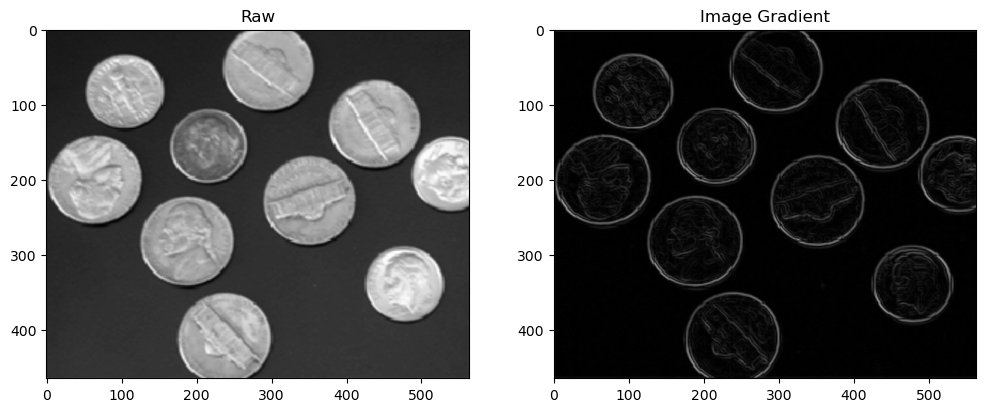

In [16]:
# 区域边界检测算法 -- 边缘检测算法
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

def ImageGradient(image):
    ## function: 计算图像的一阶梯度
    ## input: image; dtype = np.float64
    ## output: 变换后的图像
    Kx = -1*np.array([[-1,0,1]])
    Gx = ndimage.convolve(img.astype(np.float64), Kx)
    Ky = -1*np.array([[-1],[0],[1]])
    Gy = ndimage.convolve(img.astype(np.float64), Ky)
    magnitude = np.sqrt(Gx**2 + Gy**2) # G
    magnitude = magnitude.astype(np.uint8)
    return magnitude

new_img = ImageGradient(img.astype(np.float64))
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.imshow(img,cmap="gray")
plt.title("Raw")
plt.subplot(1,2,2)
plt.imshow(new_img,cmap="gray")
plt.title("Image Gradient")
plt.show()
plt.close()

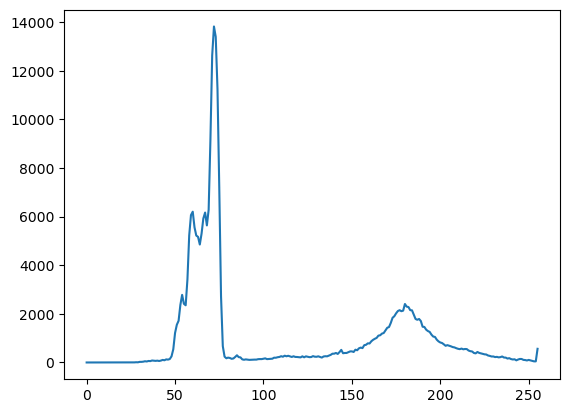

以下的阈值会获得较好的分割效果
阈值为： 90 	轮廓数量为： 14
阈值为： 91 	轮廓数量为： 12
阈值为： 92 	轮廓数量为： 13
阈值为： 94 	轮廓数量为： 14
阈值为： 95 	轮廓数量为： 14


In [18]:
# 区域边界检测算法 -- 轮廓检测算法
import matplotlib.pyplot as plt

# 转二进制图像
def ToBinray(index): # index参数是为了调试如何获得最好的分割效果
    global imgray, binary
    # 1、灰度图
    imgray = cv2.cvtColor(img, cv.COLOR_BGR2GRAY)
    # cv2.imshow('imgray', imgray)

    # 2、二进制图像
    ret, binary = cv2.threshold(imgray, index, 255, 0) # 阈值 二进制图像
    
    return binary

    # 阈值 二进制图像
    # cv2.imshow('er_jin_zhi_tu_xiang', binary)
    
    # 3、Canny 边缘检测
    binary = cv2.Canny(binary, 50, 150)
    # cv2.imshow('canny', binary)

# 提取轮廓
def GetContours():
    # 1、根据二值图找到轮廓
    # https://blog.csdn.net/laobai1015/article/details/76400725
    contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    # 轮廓      层级                               轮廓检索模式(推荐此)  轮廓逼近方法

    # 2、画出轮廓
    dst = img.copy()
    dst = cv2.drawContours(dst, contours, -1,                (0, 0, 255), 3)
    #                           轮廓     第几个(默认-1：所有)   颜色       线条厚度
    
    return contours

img = cv2.imread('coin.png')
# cv.imshow('img', img)
    
# 绘制直方图
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()
    
# 创建一个数组
shuzu = []

for i in range(255):
    ToBinray(i)              #转二进制
    contours = GetContours()           #提取轮廓
    num = len(contours)
    if num < 15 and num > 10:
        # 把阈值和数量存入数组
        shuzu.append([i, num])
    
print("以下的阈值会获得较好的分割效果")
for i in range(len(shuzu)):
    print("阈值为：", shuzu[i][0], "\t轮廓数量为：", shuzu[i][1])
        
# 函数实现的效果不是很理想，但是对于文件中的test文件这种比较简单的图形，是可以获得很准确的轮廓检测

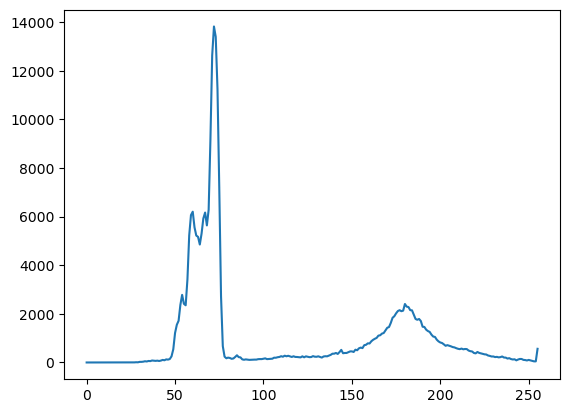

一共有{}个轮廓 14
阈值： 0 	轮廓面积： 0.0 	面积过小，可能是错误分类
阈值： 1 	轮廓面积： 11617.0 	轮廓周长： 408.534051656723
阈值： 2 	轮廓面积： 8332.5 	轮廓周长： 350.97770273685455
阈值： 3 	轮廓面积： 11650.5 	轮廓周长： 409.6051193475723
阈值： 4 	轮廓面积： 11413.5 	轮廓周长： 409.6051193475723
阈值： 5 	轮廓面积： 6396.0 	轮廓周长： 314.16652059555054
阈值： 6 	轮廓面积： 11532.5 	轮廓周长： 409.26197350025177
阈值： 7 	轮廓面积： 7952.5 	轮廓周长： 341.66399443149567
阈值： 8 	轮廓面积： 4.0 	面积过小，可能是错误分类
阈值： 9 	轮廓面积： 15.0 	面积过小，可能是错误分类
阈值： 10 	轮廓面积： 28.0 	面积过小，可能是错误分类
阈值： 11 	轮廓面积： 11211.5 	轮廓周长： 404.43354642391205
阈值： 12 	轮廓面积： 8050.5 	轮廓周长： 340.14927566051483
阈值： 13 	轮廓面积： 11183.5 	轮廓周长： 1389.320848584175


In [4]:
# 区域边界检测算法 -- 轮廓检测算法
# 设置全局遍历有问题
import matplotlib.pyplot as plt
import cv2

# 转二进制图像
def ToBinray(): # index参数是为了调试如何获得最好的分割效果
    global imgray, binary
    # 1、灰度图
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imshow('imgray', imgray)

    # 2、二进制图像
    ret, binary = cv2.threshold(imgray, 90, 255, 0) # 阈值 二进制图像

    # 阈值 二进制图像
    cv2.imshow('er_jin_zhi_tu_xiang', binary)

    # 3、Canny 边缘检测
    # binary = cv2.Canny(binary, 50, 150)
    # cv2.imshow('canny', binary)

# 提取轮廓
def GetContours():
    global contours
    # 1、根据二值图找到轮廓
    # https://blog.csdn.net/laobai1015/article/details/76400725
    contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    # 轮廓      层级                               轮廓检索模式(推荐此)  轮廓逼近方法

    # 2、画出轮廓
    dst = img.copy()
    dst = cv2.drawContours(dst, contours, -1,                (0, 0, 255), 3)
    #                           轮廓     第几个(默认-1：所有)   颜色       线条厚度

    print("一共有{}个轮廓", len(contours))

    cv2.imshow('luo_kuo', dst)

    return contours

# 获取轮廓信息
def GetContours_Attrib(contours, i):
    # 画出第一个轮廓
    cnt = contours[i]
    dst = img.copy()
    dst = cv2.drawContours(dst, cnt, -1, (0, 0, 255), 3)
    

    # 获取轮廓面积 和 周长（True表示合并）
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    if area > 1000:
        cv2.imshow('contour{}'.format(i), dst)
        print("阈值：", i, "\t轮廓面积：", area, "\t轮廓周长：", perimeter)
    else:
        print("阈值：", i, "\t轮廓面积：", area, "\t面积过小，可能是错误分类")

# 获取外接圆
def Circle():
    # 1、获取第一个轮廓
    cnt = contours[0]

    # 2、获取外接圆
    (x, y), radius = cv2.minEnclosingCircle(cnt)
    # 坐标   半径

    # 3、画圆
    dst = img.copy()
    dst = cv2.circle(dst, (int(x), int(y)), int(radius), (0, 0, 255), 3)

    # 显示
    cv2.imshow("wai_jie_yuan", dst)


img = cv2.imread('coin.png')
cv2.imshow('img', img)

# 绘制直方图
global sum_sz, sum_zc
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

ToBinray()              #转二进制
contours = GetContours()           #提取轮廓
for i in range(len(contours)):
    GetContours_Attrib(contours, i)    #获取轮廓信息

cv2.waitKey(0)
cv2.destroyAllWindows()
# 函数实现的效果不是很理想，但是对于文件中的test文件这种比较简单的图形，是可以获得很准确的轮廓检测

In [ ]:
# 区域边界检测算法 -- 轮廓检测算法
import cv2 as cv
import matplotlib.pyplot as plt

# 转二进制图像
def ToBinray(): # index参数是为了调试如何获得最好的分割效果
    global imgray, binary
    # 1、灰度图
    imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    cv.imshow('imgray', imgray)

    # 2、二进制图像
    ret, binary = cv.threshold(imgray, 91, 255, 0) # 阈值 二进制图像

    # 阈值 二进制图像
    cv.imshow('er_jin_zhi_tu_xiang', binary)

    # 3、Canny 边缘检测
    binary = cv.Canny(binary, 50, 150)
    cv.imshow('canny', binary)

# 提取轮廓
def GetContours():
    global contours
    # 1、根据二值图找到轮廓
    # https://blog.csdn.net/laobai1015/article/details/76400725
    contours, hierarchy = cv.findContours(binary, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
    # 轮廓      层级                               轮廓检索模式(推荐此)  轮廓逼近方法

    # 2、画出轮廓
    dst = img.copy()
    dst = cv.drawContours(dst, contours, -1,                (0, 0, 255), 3)
    #                           轮廓     第几个(默认-1：所有)   颜色       线条厚度

    print("一共有{}个轮廓", len(contours))

    cv.imshow('luo_kuo', dst)

    return contours

# 获取轮廓信息
def GetContours_Attrib(contours, i):
    # 画出第一个轮廓
    
    cnt = contours[i]
    dst = img.copy()
    dst = cv.drawContours(dst, cnt, -1, (0, 0, 255), 3)


    # 获取轮廓面积 和 周长（True表示合并）
    area = cv.contourArea(cnt)
    perimeter = cv.arcLength(cnt, True)
    if area > 1000:
        cv.imshow('contour{}'.format(i), dst)
        print("阈值：", i, "\t轮廓面积：", area, "\t轮廓周长：", perimeter)
    else:
        print("阈值：", i, "\t轮廓面积：", area, "\t面积过小，可能是错误分类")

# 轮廓近似
def GetApprox():
    # 1、取外围轮廓
    cnt = contours[0]

    # 2、设置精度（从轮廓到近似轮廓的最大距离）
    epsilon = 0.01 * cv.arcLength(cnt, True)
    #                            轮廓  闭合轮廓还是曲线

    # 3、获取近似轮廓
    approx = cv.approxPolyDP(cnt, epsilon,          True)
    #                             近似度(这里为5%)   闭合轮廓还是曲线

    # 4、绘制轮廓
    dst = img.copy()
    dst = cv.drawContours(dst, [approx], -1, (0, 0, 255), 3)

    # 显示
    cv.imshow("lun_kuo_jin_si", dst)

# 获取边界矩形
def BoundingRect():
    # 1、取外围轮廓
    cnt = contours[0]

    # 2、获取正方形坐标长宽
    x, y, w, h = cv.boundingRect(cnt)

    # 3、画出矩形
    dst = img.copy()
    dst = cv.rectangle(dst, (x,y),(x+w,y+h), (0,0,255), 3)

    # 显示
    cv.imshow("bian_jie_ju_xing", dst)

# 获取外接圆
def Circle():
    # 1、获取第一个轮廓
    cnt = contours[0]

    # 2、获取外接圆
    (x, y), radius = cv.minEnclosingCircle(cnt)
    # 坐标   半径

    # 3、画圆
    dst = img.copy()
    dst = cv.circle(dst, (int(x), int(y)), int(radius), (0, 0, 255), 3)

    # 显示
    cv.imshow("wai_jie_yuan", dst)


if __name__ == '__main__':
    img = cv.imread('coin.png')
    cv.imshow('img', img)

    # 绘制直方图
    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.show()

    ToBinray()              #转二进制
    contours = GetContours()           #提取轮廓
    for i in range(len(contours)):
        GetContours_Attrib(contours, i)    #获取轮廓信息

    cv.waitKey(0)

# 函数实现的效果不是很理想，但是对于文件中的test文件这种比较简单的图形，是可以获得很准确的轮廓检测

In [ ]:
# 1.	彩色目标检测
import cv2
import numpy as np

# 读取图像
image = cv2.imread('1_count.bmp')

# 将图像转换为HSV颜色空间
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 定义浅绿色范围
lower_light_green = np.array([35, 50, 50])  # 最低浅绿色值
upper_light_green = np.array([85, 255, 255])  # 最高浅绿色值

# 创建浅绿色的掩码
light_green_mask = cv2.inRange(hsv_image, lower_light_green, upper_light_green)

# 定义红色范围
lower_red1 = np.array([0, 100, 100])  # 最低红色值（第一部分）
upper_red1 = np.array([10, 255, 255])  # 最高红色值（第一部分）

lower_red2 = np.array([160, 100, 100])  # 最低红色值（第二部分）
upper_red2 = np.array([180, 255, 255])  # 最高红色值（第二部分）

# 创建红色的掩码
red_mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)

# 合并两个红色掩码
red_mask = cv2.bitwise_or(red_mask1, red_mask2)

# 执行形状检测并统计数量
contours_light_green, _ = cv2.findContours(light_green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_red, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

light_green_shape_count = len(contours_light_green)
red_shape_count = len(contours_red)

print("Number of light green shapes:", light_green_shape_count)
print("Number of red shapes:", red_shape_count)

# 在图像上绘制轮廓以可视化检测的形状
cv2.drawContours(image, contours_light_green, -1, (0, 255, 0), 2)
cv2.drawContours(image, contours_red, -1, (0, 0, 255), 2)
cv2.imshow("Contours", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of light green shapes: 6
Number of red shapes: 28


# 人手分割

In [1]:
import cv2
import numpy as np

# 读取图像
image = cv2.imread('1_rs1.png')

# 将图像从BGR颜色空间转换为HSV颜色空间
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 定义第一个HSV范围
lower_skin1 = np.array([155, 30, 39], dtype=np.uint8)
upper_skin1 = np.array([179, 255, 255], dtype=np.uint8)

# 定义第二个HSV范围
lower_skin2 = np.array([0, 30, 39], dtype=np.uint8)
upper_skin2 = np.array([20, 255, 255], dtype=np.uint8)

# 创建第一个掩码
skin_mask1 = cv2.inRange(hsv, lower_skin1, upper_skin1)

# 创建第二个掩码
skin_mask2 = cv2.inRange(hsv, lower_skin2, upper_skin2)

# 使用逻辑或运算合并两个掩码
combined_skin_mask = cv2.bitwise_or(skin_mask1, skin_mask2)

# 对图像应用组合的掩码，提取两个范围内的区域
skin = cv2.bitwise_and(image, image, mask=combined_skin_mask)

# 显示结果
cv2.imshow('Original Image', image)
cv2.imshow('Skin Region', skin)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import cv2
import numpy as np

# 读取图像
image = cv2.imread('1_rs2.png')

# 将图像从BGR颜色空间转换为HSV颜色空间
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 定义第一个HSV范围
lower_skin1 = np.array([155, 30, 39], dtype=np.uint8)
upper_skin1 = np.array([179, 255, 255], dtype=np.uint8)

# 定义第二个HSV范围
lower_skin2 = np.array([0, 30, 39], dtype=np.uint8)
upper_skin2 = np.array([20, 255, 255], dtype=np.uint8)

# 创建第一个掩码
skin_mask1 = cv2.inRange(hsv, lower_skin1, upper_skin1)

# 创建第二个掩码
skin_mask2 = cv2.inRange(hsv, lower_skin2, upper_skin2)

# 使用逻辑或运算合并两个掩码
combined_skin_mask = cv2.bitwise_or(skin_mask1, skin_mask2)

# 对图像应用组合的掩码，提取两个范围内的区域
skin = cv2.bitwise_and(image, image, mask=combined_skin_mask)

# 显示结果
cv2.imshow('Original Image', image)
cv2.imshow('Skin Region', skin)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 汽车车牌检测

#### HSV分割的方法实现的效果不是很明显

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# plt显示彩色图片
def plt_show(img):
    #cv2与plt的图像通道不同：cv2为[b,g,r];plt为[r, g, b]
    b,g,r = cv2.split(img)
    img = cv2.merge([r, g, b])
    plt.imshow(img)
    plt.show()

# 读取图片
image = cv2.imread('1_Car2.jpg')

# 将图片转换为HSV颜色空间
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 定义蓝色的HSV范围
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])

# 使用 inRange 函数获取蓝色区域的二值图像
blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)
cv2.imshow('Blue Mask', blue_mask)
kernel = np.ones((5, 5), np.uint8)
blue_mask = cv2.erode(blue_mask, kernel)
blue_mask = cv2.dilate(blue_mask, kernel)
cv2.imshow('Blue Mask 2', blue_mask)


# 执行轮廓检测
contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 找到最大的轮廓
max_contour = max(contours, key=cv2.contourArea)

# 创建一个掩码，将除了最大轮廓外的部分设为黑色
mask = np.zeros_like(blue_mask)
cv2.drawContours(mask, [max_contour], 0, 255, thickness=cv2.FILLED)

# 将原始图像和掩码进行按位与操作
result = cv2.bitwise_and(image, image, mask=mask)

# 获得这个轮廓的位置信息
x, y, w, h = cv2.boundingRect(max_contour)

# 在原图片中截取出来
result = image[y + 3:y + h - 3, x + 3:x + w - 3]

# 高斯滤波
result_gauss = cv2.GaussianBlur(result, (3, 3), 0)
gray = cv2.cvtColor(result_gauss, cv2.COLOR_BGR2GRAY)
cv2.imshow('Gray Image', gray)

# 边缘分割，将image分割出来
# 先膨胀后稍微腐蚀
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
gray = cv2.dilate(gray, kernel)
cv2.imshow('final',gray)
ret, image = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))

# 找出所有轮廓的外接圆
for i in range(len(contours)):
    cnt = contours[i]
    (x, y), radius = cv2.minEnclosingCircle(cnt)

    # result图片的长宽数据
    height, width = result.shape[:2]
    if radius >= 13 and radius <= 27 and y > (height/2)-7 and y < (height/2)+7:
        print("i",i,"radius",radius, "y", y)

        # 3、画圆
        image = cv2.circle(result, (int(x), int(y)), 1, (0, 0, 255), 2)
    else:
        print("--",i,"radius",radius, "y", y)

# 最后结果
print("最后结果")
cv2.imshow('result',image)

cv2.waitKey(0)
cv2.destroyAllWindows()

11
-- 0 radius 4.924529075622559 y 30.5
-- 1 radius 5.385264873504639 y 30.0
-- 2 radius 2.2361679077148438 y 21.0
i 3 radius 13.380742073059082 y 23.959999084472656
i 4 radius 17.270240783691406 y 22.08823585510254
i 5 radius 17.564268112182617 y 22.5
i 6 radius 17.29261589050293 y 22.176469802856445
i 7 radius 17.356653213500977 y 22.0
i 8 radius 17.64274787902832 y 21.614286422729492
i 9 radius 17.993947982788086 y 21.882352828979492
-- 10 radius 8.558721542358398 y 7.0
最后结果


[[0, 56, 3, 3], [3, 9, 28, 44], [29, 0, 29, 3], [35, 9, 27, 44], [60, 0, 92, 7], [68, 28, 7, 8], [80, 9, 28, 44], [111, 10, 27, 42], [140, 0, 101, 59], [144, 9, 27, 43], [172, 8, 29, 43], [173, 0, 11, 6], [202, 7, 28, 42]]


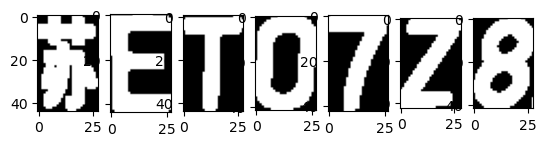

['苏', 'E', 'T', '0', '7', 'Z', '8']
苏ET07Z8


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# plt显示彩色图片
def plt_show(img):
    #cv2与plt的图像通道不同：cv2为[b,g,r];plt为[r, g, b]
    b,g,r = cv2.split(img)
    img = cv2.merge([r, g, b])
    plt.imshow(img)
    plt.show()

# 读取图片
origin_image = cv2.imread('1_Car1.jpg')
image = cv2.imread('1_Car1.jpg')

# 将图片转换为HSV颜色空间
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 定义蓝色的HSV范围
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])

# 使用 inRange 函数获取蓝色区域的二值图像
blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)
# cv2.imshow('Blue Mask', blue_mask)
kernel = np.ones((5, 5), np.uint8)
blue_mask = cv2.erode(blue_mask, kernel)
blue_mask = cv2.dilate(blue_mask, kernel)
# cv2.imshow('Blue Mask 2', blue_mask)


# 执行轮廓检测
contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 找到最大的轮廓
max_contour = max(contours, key=cv2.contourArea)

# 创建一个掩码，将除了最大轮廓外的部分设为黑色
mask = np.zeros_like(blue_mask)
cv2.drawContours(mask, [max_contour], 0, 255, thickness=cv2.FILLED)

# 将原始图像和掩码进行按位与操作
result = cv2.bitwise_and(image, image, mask=mask)

# 获得这个轮廓的位置信息
x, y, w, h = cv2.boundingRect(max_contour)

# 在原图片中截取出来
result = origin_image[y + 3:y + h - 3, x + 3:x + w - 3]

# 高斯滤波
image = cv2.GaussianBlur(result, (3, 3), 0)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
ret, image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU)

#膨胀操作，使“苏”字膨胀为一个近似的整体，为分割做准备
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 4))
image = cv2.dilate(image, kernel)
cv2.imshow('Gray Image', image)

# 查找轮廓
contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
words = []
word_images = []
#对所有轮廓逐一操作
for item in contours:
    word = []
    rect = cv2.boundingRect(item)
    x = rect[0]
    y = rect[1]
    weight = rect[2]
    height = rect[3]
    word.append(x)
    word.append(y)
    word.append(weight)
    word.append(height)
    words.append(word)
# 排序，车牌号有顺序。words是一个嵌套列表
words = sorted(words,key=lambda s:s[0],reverse=False)
i = 0
#word中存放轮廓的起始点和宽高
for word in words:
    # 筛选字符的轮廓
    if (word[3] > (word[2] * 1)) and (word[3] < (word[2] * 5)) and (word[2] > 10):
        i = i+1
        splite_image = image[word[1]:word[1] + word[3], word[0]:word[0] + word[2]]
        word_images.append(splite_image)
        # print(i)
print(words)

for i,j in enumerate(word_images):
    plt.subplot(1,7,i+1)
    plt.imshow(word_images[i],cmap='gray')
plt.show()

#模版匹配
# 准备模板(template[0-9]为数字模板；)
template = ['0','1','2','3','4','5','6','7','8','9',
            'A','B','C','D','E','F','G','H','J','K','L','M','N','P','Q','R','S','T','U','V','W','X','Y','Z',
            '藏','川','鄂','甘','赣','贵','桂','黑','沪','吉','冀','津','晋','京','辽','鲁','蒙','闽','宁',
            '青','琼','陕','苏','皖','湘','新','渝','豫','粤','云','浙']

# 读取一个文件夹下的所有图片，输入参数是文件名，返回模板文件地址列表
def read_directory(directory_name):
    referImg_list = []
    for filename in os.listdir(directory_name):
        referImg_list.append(directory_name + "/" + filename)
    return referImg_list

# 获得中文模板列表（只匹配车牌的第一个字符）
def get_chinese_words_list():
    chinese_words_list = []
    for i in range(34,64):
        #将模板存放在字典中
        c_word = read_directory('./refer1/'+ template[i])
        chinese_words_list.append(c_word)
    return chinese_words_list
chinese_words_list = get_chinese_words_list()


# 获得英文模板列表（只匹配车牌的第二个字符）
def get_eng_words_list():
    eng_words_list = []
    for i in range(10,34):
        e_word = read_directory('./refer1/'+ template[i])
        eng_words_list.append(e_word)
    return eng_words_list
eng_words_list = get_eng_words_list()


# 获得英文和数字模板列表（匹配车牌后面的字符）
def get_eng_num_words_list():
    eng_num_words_list = []
    for i in range(0,34):
        word = read_directory('./refer1/'+ template[i])
        eng_num_words_list.append(word)
    return eng_num_words_list
eng_num_words_list = get_eng_num_words_list()


# 读取一个模板地址与图片进行匹配，返回得分
def template_score(template,image):
    #将模板进行格式转换
    template_img=cv2.imdecode(np.fromfile(template,dtype=np.uint8),1)
    template_img = cv2.cvtColor(template_img, cv2.COLOR_RGB2GRAY)
    #模板图像阈值化处理——获得黑白图
    ret, template_img = cv2.threshold(template_img, 0, 255, cv2.THRESH_OTSU)
    #     height, width = template_img.shape
    #     image_ = image.copy()
    #     image_ = cv2.resize(image_, (width, height))
    image_ = image.copy()
    #获得待检测图片的尺寸
    height, width = image_.shape
    # 将模板resize至与图像一样大小
    template_img = cv2.resize(template_img, (width, height))
    # 模板匹配，返回匹配得分
    result = cv2.matchTemplate(image_, template_img, cv2.TM_CCOEFF)
    return result[0][0]


# 对分割得到的字符逐一匹配
def template_matching(word_images):
    results = []
    for index,word_image in enumerate(word_images):
        if index==0:
            best_score = []
            for chinese_words in chinese_words_list:
                score = []
                for chinese_word in chinese_words:
                    result = template_score(chinese_word,word_image)
                    score.append(result)
                best_score.append(max(score))
            i = best_score.index(max(best_score))
            # print(template[34+i])
            r = template[34+i]
            results.append(r)
            continue
        if index==1:
            best_score = []
            for eng_word_list in eng_words_list:
                score = []
                for eng_word in eng_word_list:
                    result = template_score(eng_word,word_image)
                    score.append(result)
                best_score.append(max(score))
            i = best_score.index(max(best_score))
            # print(template[10+i])
            r = template[10+i]
            results.append(r)
            continue
        else:
            best_score = []
            for eng_num_word_list in eng_num_words_list:
                score = []
                for eng_num_word in eng_num_word_list:
                    result = template_score(eng_num_word,word_image)
                    score.append(result)
                best_score.append(max(score))
            i = best_score.index(max(best_score))
            # print(template[i])
            r = template[i]
            results.append(r)
            continue
    return results


word_images_ = word_images.copy()
# 调用函数获得结果
result = template_matching(word_images_)
# print(result)
# "".join(result)函数将列表转换为拼接好的字符串，方便结果显示
# print( "".join(result))

from PIL import ImageFont, ImageDraw, Image

height,weight = origin_image.shape[0:2]
# print(height)
# print(weight)

image_1 = origin_image.copy()
cv2.rectangle(image_1, (int(0.2*weight), int(0.75*height)), (int(weight*0.9), int(height*0.95)), (0, 255, 0), 5)

#设置需要显示的字体
fontpath = "font/simsun.ttc"
font = ImageFont.truetype(fontpath,64)
img_pil = Image.fromarray(image_1)
draw = ImageDraw.Draw(img_pil)
#绘制文字信息
draw.text((int(0.2*weight)+25, int(0.75*height)),  "".join(result), font = font, fill = (255, 255, 0))
bk_img = np.array(img_pil)
print(result)
print( "".join(result))
cv2.imshow("result",bk_img)

cv2.waitKey(0)
cv2.destroyAllWindows()